### 多项式回归

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [ ]:
plt.scatter(X, y)
plt.show()

### 使用线性回归来拟合

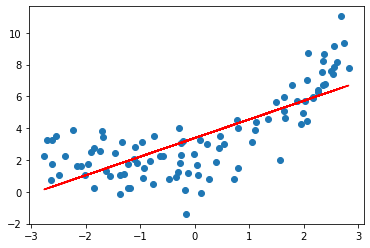

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_predicted = lin_reg.predict(X)

plt.scatter(x, y)
plt.plot(x, y_predicted, color="r")
plt.show()

### 解决方案,添加一个特征

In [5]:
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

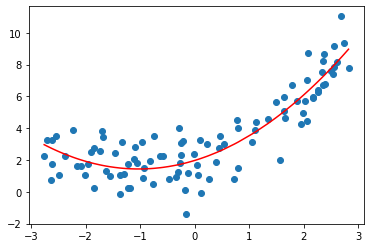

In [6]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

y_predicted2 = lin_reg2.predict(X2)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predicted2[np.argsort(x)], color="r")
plt.show()

In [7]:
lin_reg2.coef_

array([1.04275736, 0.50867947])

In [8]:
lin_reg2.intercept_

1.9687828399561467

### scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xx = np.random.uniform(-3, 3, size=100)
X = xx.reshape(-1, 1)

y = 0.5 * xx ** 2 + xx + 2 + np.random.normal(0, 1, size=100)

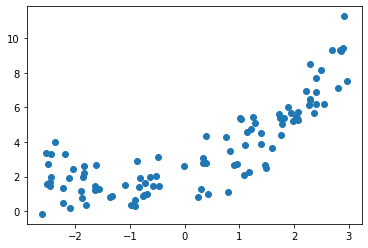

In [4]:
plt.scatter(xx, y)
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X_poly = poly.transform(X)
X_poly.shape

(100, 3)

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
y_predicted_poly = lin_reg_poly.predict(X_poly)

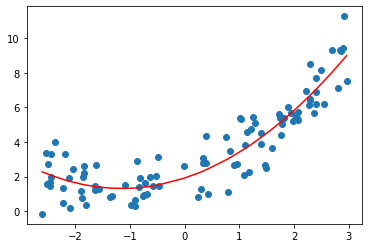

In [10]:
plt.scatter(xx, y)
plt.plot(np.sort(xx), y_predicted_poly[np.argsort(xx)], color="r")
plt.show()

In [11]:
lin_reg_poly.coef_

array([0.        , 1.04361518, 0.45497956])

In [12]:
lin_reg_poly.intercept_

1.9127462498400138

### 关于PolynomialFeatures

In [17]:
X_poly = np.arange(1, 11).reshape(-1, 2)
print(X_poly)
print(X_poly.shape)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
(5, 2)


In [18]:
poly2 = PolynomialFeatures(degree=2)
poly2.fit(X_poly)
X_poly_2 = poly2.transform(X_poly)
print(X_poly_2)
print(X_poly_2.shape)

[[  1.   1.   2.   1.   2.   4.]
 [  1.   3.   4.   9.  12.  16.]
 [  1.   5.   6.  25.  30.  36.]
 [  1.   7.   8.  49.  56.  64.]
 [  1.   9.  10.  81.  90. 100.]]
(5, 6)


In [21]:
poly3 = PolynomialFeatures(degree=3)
poly3.fit(X_poly)
X_poly_3 = poly3.transform(X_poly)
print(X_poly_3)
print(X_poly_3.shape)

[[   1.    1.    2.    1.    2.    4.    1.    2.    4.    8.]
 [   1.    3.    4.    9.   12.   16.   27.   36.   48.   64.]
 [   1.    5.    6.   25.   30.   36.  125.  150.  180.  216.]
 [   1.    7.    8.   49.   56.   64.  343.  392.  448.  512.]
 [   1.    9.   10.   81.   90.  100.  729.  810.  900. 1000.]]
(5, 10)


### pipeline(管道)

In [22]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + xx + 2 + np.random.normal(0, 1, size=100)

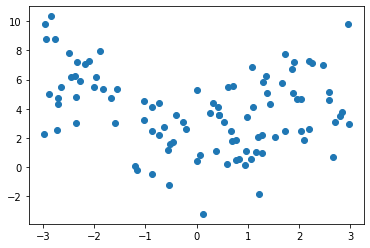

In [29]:
plt.scatter(x, y)
plt.show()

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [24]:
poly_reg.fit(X, y)
y_predicted = poly_reg.predict(X)

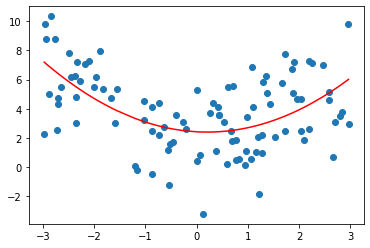

In [25]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predicted[np.argsort(x)], color="r")
plt.show()